In [2]:
def quad(a, b, c, x): return a*x**2 + b*x + c
from functools import partial
def mk_quad(a, b, c): return partial(quad, a, b, c)

In [3]:
f = mk_quad(4, 5, 1)
f(1.5)

17.5

In [4]:
def plot_function(func, title=""):
    x = np.arange(-2, 2, 0.1)
    y = func(x)
    plt.title(title)
    plt.plot(x, y)
    

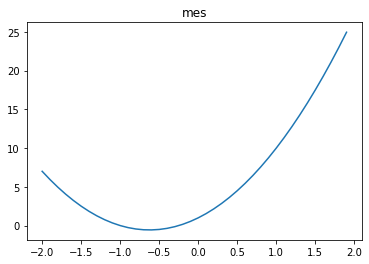

In [6]:
plot_function(f, "mes")

In [7]:
from numpy.random import normal, seed, uniform
np.random.seed(84)
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)

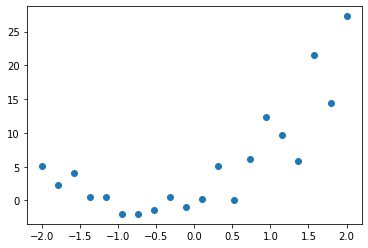

In [8]:
import torch
x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

In [11]:
from ipywidgets import interact
from matplotlib.pyplot import ylim
def mse(preds, acts): return ((preds-acts)**2).mean()

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a, b, c)
    plt.scatter(x, y)
    loss = mse(f(x), y)
    plot_function(mk_quad(a, b, c), title=f"MSE: {loss :.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

# automating the reducing mse process

In [12]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

In [13]:
quad_mse([1.5, 1.5, 1.5])

tensor(32.9088, dtype=torch.float64)

In [14]:
abc = torch.tensor((1.5, 1.5, 1.5))
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [15]:
loss = quad_mse(abc)
loss

tensor(32.9088, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [16]:
loss.backward()

In [17]:
abc.grad

tensor([-12.3398,  -8.9288,  -3.5367])

In [18]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mse(abc)
print(f'loss = {loss:.2f}')

loss = 30.55


In [19]:
abc.grad

tensor([-12.3398,  -8.9288,  -3.5367])

# lesson3 41:51

[lesson 3 41:51](https://code.visualstudio.com/docs/?dv=darwinx64)